In [11]:
# Use InstaLoader to retrieve the number of followers of each political party and save it an CSV file
import instaloader
import csv

L = instaloader.Instaloader()

# Write a list with the political party Instagram usernames
party_usernames = ['partido_socialista', 'partidosocialdemocrata', 'partidochega', 'liberalpt',
                   'blocodeesquerdaoficial', 'pcp.pt', 'partidolivre', 'partido_pan']

# Create a list to store followers count for each party
followers_data = []

# Iterate over each political party username
for username in party_usernames:
    try:
        profile = instaloader.Profile.from_username(L.context, username)
        
        # Get followers count
        followers_count = profile.followers
        
        # Append data to the list
        followers_data.append({'Username': username, 'Followers': followers_count})
    except Exception as e:
        print(f"Error processing {username}: {e}")

# Save it the file
csv_file = "parties_followers_count.csv"
fieldnames = ['Username', 'Followers']

with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    
    writer.writeheader()
    writer.writerows(followers_data)

print("Data saved to parties_followers_count.csv")

Data saved to parties_followers_count.csv


In [12]:
# Add a new column with party names to the file to identify the party

import pandas as pd

followers_df = pd.read_csv("parties_followers_count.csv")

# Define a dictionary to attribute usernames to party names
party_mapping = {
    'partido_socialista': 'PS',
    'partidosocialdemocrata': 'PPD/PSD.CDS-PP.PPM',
    'partidochega': 'CH',
    'liberalpt': 'IL',
    'blocodeesquerdaoficial': 'B.E.',
    'pcp.pt': 'PCP-PEV',
    'partidolivre': 'L',
    'partido_pan': 'PAN'
}

# Add a new column with party names based on the dictionary
followers_df['Political Party'] = followers_df['Username'].map(party_mapping)

# Save it 
followers_df.to_csv("parties_followers_count.csv", index=False)

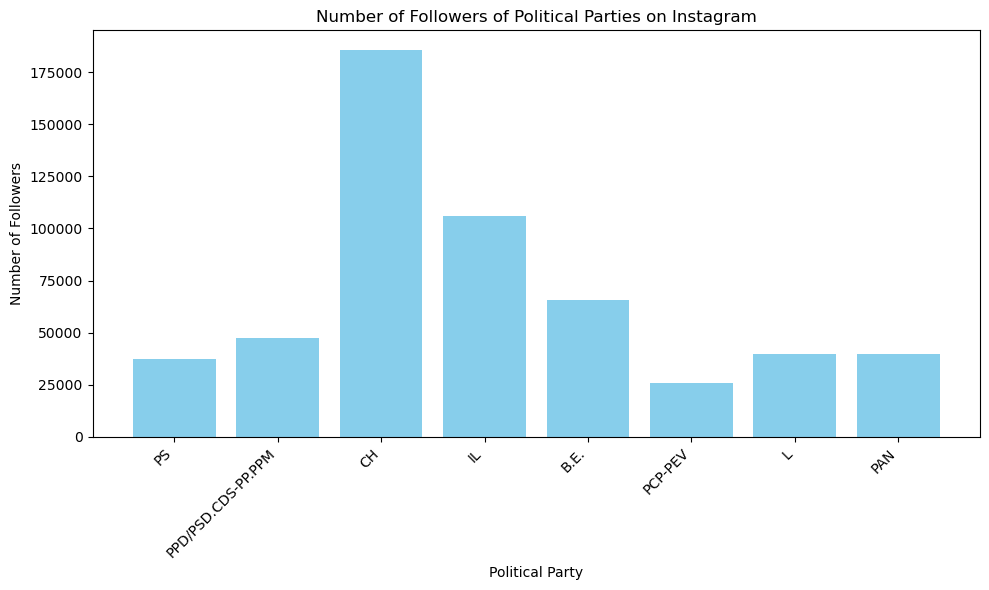

In [13]:
# Create a bar graph with the followers count

import matplotlib.pyplot as plt

followers_df = pd.read_csv("parties_followers_count.csv")

plt.figure(figsize=(10, 6))
plt.bar(followers_df['Political Party'], followers_df['Followers'], color='skyblue')
plt.xlabel('Political Party')
plt.ylabel('Number of Followers')
plt.title('Number of Followers of Political Parties on Instagram')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

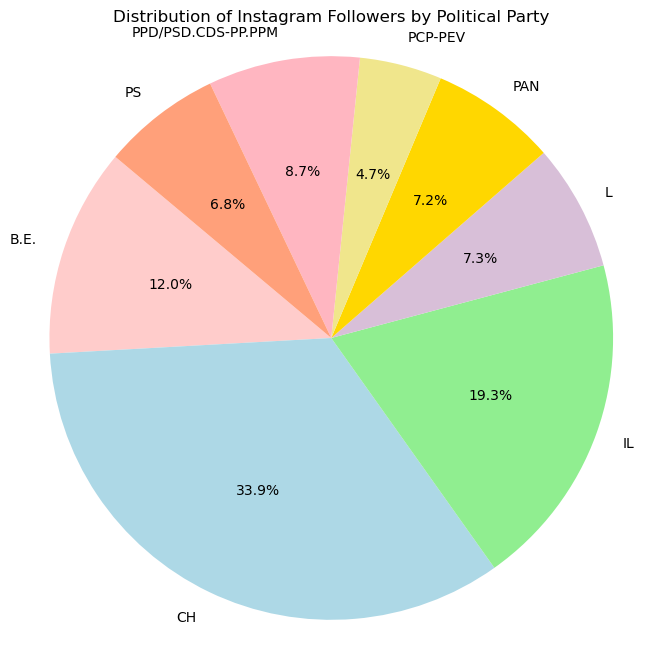

In [1]:
# Create a pie chart for the followers count

import pandas as pd
import matplotlib.pyplot as plt

followers_df = pd.read_csv("parties_followers_count.csv")

# Group followers count by party name
party_followers = followers_df.groupby('Political Party')['Followers'].sum()

# Put pastel colors
pastel_colors = ['#FFCCCB', '#ADD8E6', '#90EE90', '#D8BFD8', '#FFD700', '#F0E68C', '#FFB6C1', '#FFA07A']

plt.figure(figsize=(8, 8))
plt.pie(party_followers, labels=party_followers.index, autopct='%1.1f%%', startangle=140, colors=pastel_colors)
plt.title('Distribution of Instagram Followers by Political Party')
plt.axis('equal')  # to ensure that the pie is drawn as a circle
plt.show()